<a href="https://colab.research.google.com/github/itimes-digital/estudo-python-git/blob/master/machine-learning/agrupamento_hierarquico/credit_card_v2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
import matplotlib.pyplot as plt
from scipy.cluster.hierarchy import dendrogram, linkage
from sklearn.cluster import AgglomerativeClustering
import pandas as pd
from sklearn.preprocessing import StandardScaler

In [0]:
base = pd.read_csv('https://raw.githubusercontent.com/itimes-digital/estudo-python-git/master/machine-learning/dataset/credit_card_clients.csv', header = 1)

In [0]:
base['BILL_TOTAL'] = base['BILL_AMT1'] + base['BILL_AMT2'] + base['BILL_AMT3']+ base['BILL_AMT4']+ base['BILL_AMT5']+ base['BILL_AMT6']

In [4]:
base.head(10)

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,PAY_5,PAY_6,BILL_AMT1,BILL_AMT2,BILL_AMT3,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default payment next month,BILL_TOTAL
0,1,20000,2,2,1,24,2,2,-1,-1,-2,-2,3913,3102,689,0,0,0,0,689,0,0,0,0,1,7704
1,2,120000,2,2,2,26,-1,2,0,0,0,2,2682,1725,2682,3272,3455,3261,0,1000,1000,1000,0,2000,1,17077
2,3,90000,2,2,2,34,0,0,0,0,0,0,29239,14027,13559,14331,14948,15549,1518,1500,1000,1000,1000,5000,0,101653
3,4,50000,2,2,1,37,0,0,0,0,0,0,46990,48233,49291,28314,28959,29547,2000,2019,1200,1100,1069,1000,0,231334
4,5,50000,1,2,1,57,-1,0,-1,0,0,0,8617,5670,35835,20940,19146,19131,2000,36681,10000,9000,689,679,0,109339
5,6,50000,1,1,2,37,0,0,0,0,0,0,64400,57069,57608,19394,19619,20024,2500,1815,657,1000,1000,800,0,238114
6,7,500000,1,1,2,29,0,0,0,0,0,0,367965,412023,445007,542653,483003,473944,55000,40000,38000,20239,13750,13770,0,2724595
7,8,100000,2,2,2,23,0,-1,-1,0,0,-1,11876,380,601,221,-159,567,380,601,0,581,1687,1542,0,13486
8,9,140000,2,3,1,28,0,0,2,0,0,0,11285,14096,12108,12211,11793,3719,3329,0,432,1000,1000,1000,0,65212
9,10,20000,1,3,2,35,-2,-2,-2,-2,-1,-1,0,0,0,0,13007,13912,0,0,0,13007,1122,0,0,26919


In [0]:
x = base.iloc[:,[1,25]].values
scaler = StandardScaler();
x = scaler.fit_transform(x);


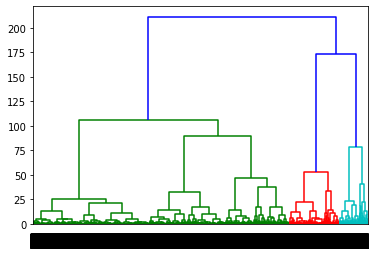

In [6]:
dendrograma = dendrogram(linkage(x, method = 'ward'))

In [0]:
hc = AgglomerativeClustering(n_clusters = 3, 
                             affinity = 'euclidean',
                             linkage = 'ward')
previsoes = hc.fit_predict(x)

In [15]:
print(previsoes)

[0 0 0 ... 0 0 0]


In [0]:
print(previsoes[6])

In [12]:
print(x)

[[-1.13672015 -0.69069198]
 [-0.3659805  -0.66599747]
 [-0.59720239 -0.44316987]
 ...
 [-1.05964618 -0.52525745]
 [-0.67427636 -0.00856436]
 [-0.90549825 -0.10271861]]


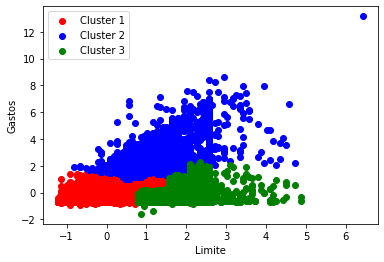

In [16]:
plt.scatter(x[previsoes == 0, 0], x[previsoes == 0, 1], c = 'red', label = 'Cluster 1')
plt.scatter(x[previsoes == 1, 0], x[previsoes == 1, 1], c = 'blue', label = 'Cluster 2')
plt.scatter(x[previsoes == 2, 0], x[previsoes == 2, 1], c = 'green', label = 'Cluster 3')
plt.xlabel('Limite')
plt.ylabel('Gastos')
plt.legend()
